In [359]:

#use pip install -r requirements.txt

**Data Description**

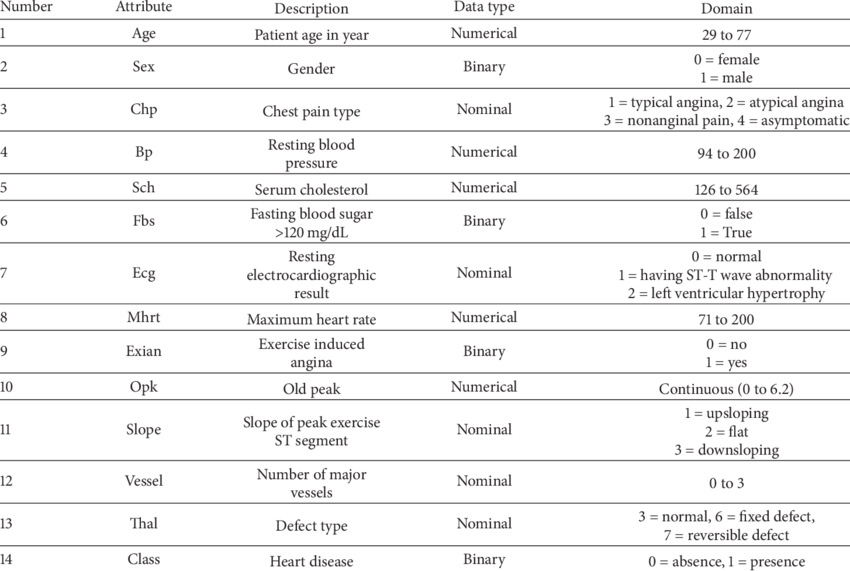

In [1]:
from IPython.display import Image

image_path = "img/attribute_information.png"

Image(filename=image_path)


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

`1` Import the data set

In [3]:
dataset = pd.read_csv("data/Heart_data.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB


**Data Cleaning**

In [5]:
#making a clone of the dataset

heart = dataset

In [6]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,NaN,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,NaN,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [7]:
heart.shape

(1592, 14)

In [8]:
heart.isna().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [10]:
heart.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [11]:
#rename the columns

heart.rename(columns={'target':'class','cp':'Chp','trestbps':'Bp','chol':'Sch','restecg':'Ecg','thalach':'Mhrt','exang':'Exain','oldpeak':'Opk','thal':'Thal','ca':'Vessel'},inplace=True)

In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1513 non-null   float64
 1   sex     1561 non-null   float64
 2   Chp     1433 non-null   float64
 3   Bp      1592 non-null   float64
 4   Sch     1529 non-null   float64
 5   fbs     1513 non-null   float64
 6   Ecg     1585 non-null   float64
 7   Mhrt    1592 non-null   float64
 8   Exain   1545 non-null   float64
 9   Opk     1561 non-null   float64
 10  slope   1538 non-null   float64
 11  Vessel  1592 non-null   float64
 12  Thal    1585 non-null   float64
 13  class   1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB


In [13]:
heart['sex'].value_counts()

sex
1.0    1074
0.0     487
Name: count, dtype: int64

In [14]:
heart['sex'] = heart['sex'].fillna(0).astype(int)


In [15]:
heart['sex'].isna().sum()

0

In [16]:
heart.isna().sum()

age        79
sex         0
Chp       159
Bp          0
Sch        63
fbs        79
Ecg         7
Mhrt        0
Exain      47
Opk        31
slope      54
Vessel      0
Thal        7
class       0
dtype: int64

In [17]:
heart['fbs'].value_counts()


fbs
0.0    1290
1.0     223
Name: count, dtype: int64

In [18]:
heart['fbs'] = heart['fbs'].fillna(heart['fbs'].median()).astype(int)

print(heart['fbs'].isna().sum())

0


In [19]:
heart.drop(columns=['fbs','Exain'], inplace=True)

In [20]:
for i in heart.columns:
    print(i, heart[i].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. nan 44. 52. 48. 54. 49. 64. 58. 60. 50.
 66. 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 68. 47. 34. 39. 35.
 29. 70. 77. 38. 74. 76.]
sex [1 0]
Chp [ 1.  4.  3.  2. nan  0.]
Bp [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
Sch [233. 286. 229. 250. 204. 236. 268. 354.  nan 203. 192. 294. 256. 263.
 199. 168. 239. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247. 167.
 230. 335. 234. 177. 353. 243. 225. 302. 212. 330. 175. 417. 197. 290.
 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232. 326. 231. 269.
 254. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274. 325. 235.
 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309. 307. 249.
 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281. 198. 221.
 205. 240. 289. 318. 298.

In [21]:
#replace nan values with mean
numeric_columns = heart.select_dtypes(include=['number']).columns
heart[numeric_columns] = heart[numeric_columns].fillna(heart[numeric_columns].mean()).astype(int)


In [22]:
heart = heart[~heart['class'].isin([2, 3, 4])]


In [23]:
heart['class'].value_counts().sort_index()

class
0    659
1    730
Name: count, dtype: int64

In [24]:
heart.isna().sum()


age       0
sex       0
Chp       0
Bp        0
Sch       0
Ecg       0
Mhrt      0
Opk       0
slope     0
Vessel    0
Thal      0
class     0
dtype: int64

In [25]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 0 to 1590
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1389 non-null   int32
 1   sex     1389 non-null   int32
 2   Chp     1389 non-null   int32
 3   Bp      1389 non-null   int32
 4   Sch     1389 non-null   int32
 5   Ecg     1389 non-null   int32
 6   Mhrt    1389 non-null   int32
 7   Opk     1389 non-null   int32
 8   slope   1389 non-null   int32
 9   Vessel  1389 non-null   int32
 10  Thal    1389 non-null   int32
 11  class   1389 non-null   int32
dtypes: int32(12)
memory usage: 76.0 KB


In [27]:
#check for outliers

cols = heart.columns

Q1 = heart[cols].quantile(0.25)
Q3 = heart[cols].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

index = np.where((heart[cols] < (Q1 - threshold * IQR)) | (heart[cols] > (Q3 + threshold * IQR)))[0]

heart = heart.drop(heart.index[index])

heart.head(2)

,age,sex,Chp,Bp,Sch,Ecg,Mhrt,Opk,slope,Vessel,Thal,class
4,41,0,2,130,204,2,172,1,1,0,3,0
5,56,1,2,120,236,0,178,0,1,0,3,0


**Descriptive statistics**

In [28]:
heart.describe()

,age,sex,Chp,Bp,Sch,Ecg,Mhrt,Opk,slope,Vessel,Thal,class
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,53.369159,0.621495,1.403738,128.842056,241.976636,0.624299,153.154206,0.482243,1.414953,0.440187,2.462617,0.570093
std,9.019736,0.485241,1.210951,15.181235,43.002713,0.674934,21.774324,0.677835,0.580120,0.678186,0.591493,0.495294
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,95.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,211.000000,0.000000,141.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,240.000000,1.000000,158.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,59.750000,1.000000,2.000000,140.000000,269.000000,1.000000,170.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,4.000000,170.000000,360.000000,2.000000,202.000000,2.000000,3.000000,2.000000,3.000000,1.000000


**Exploratory Data Analysis**

Patient demographics

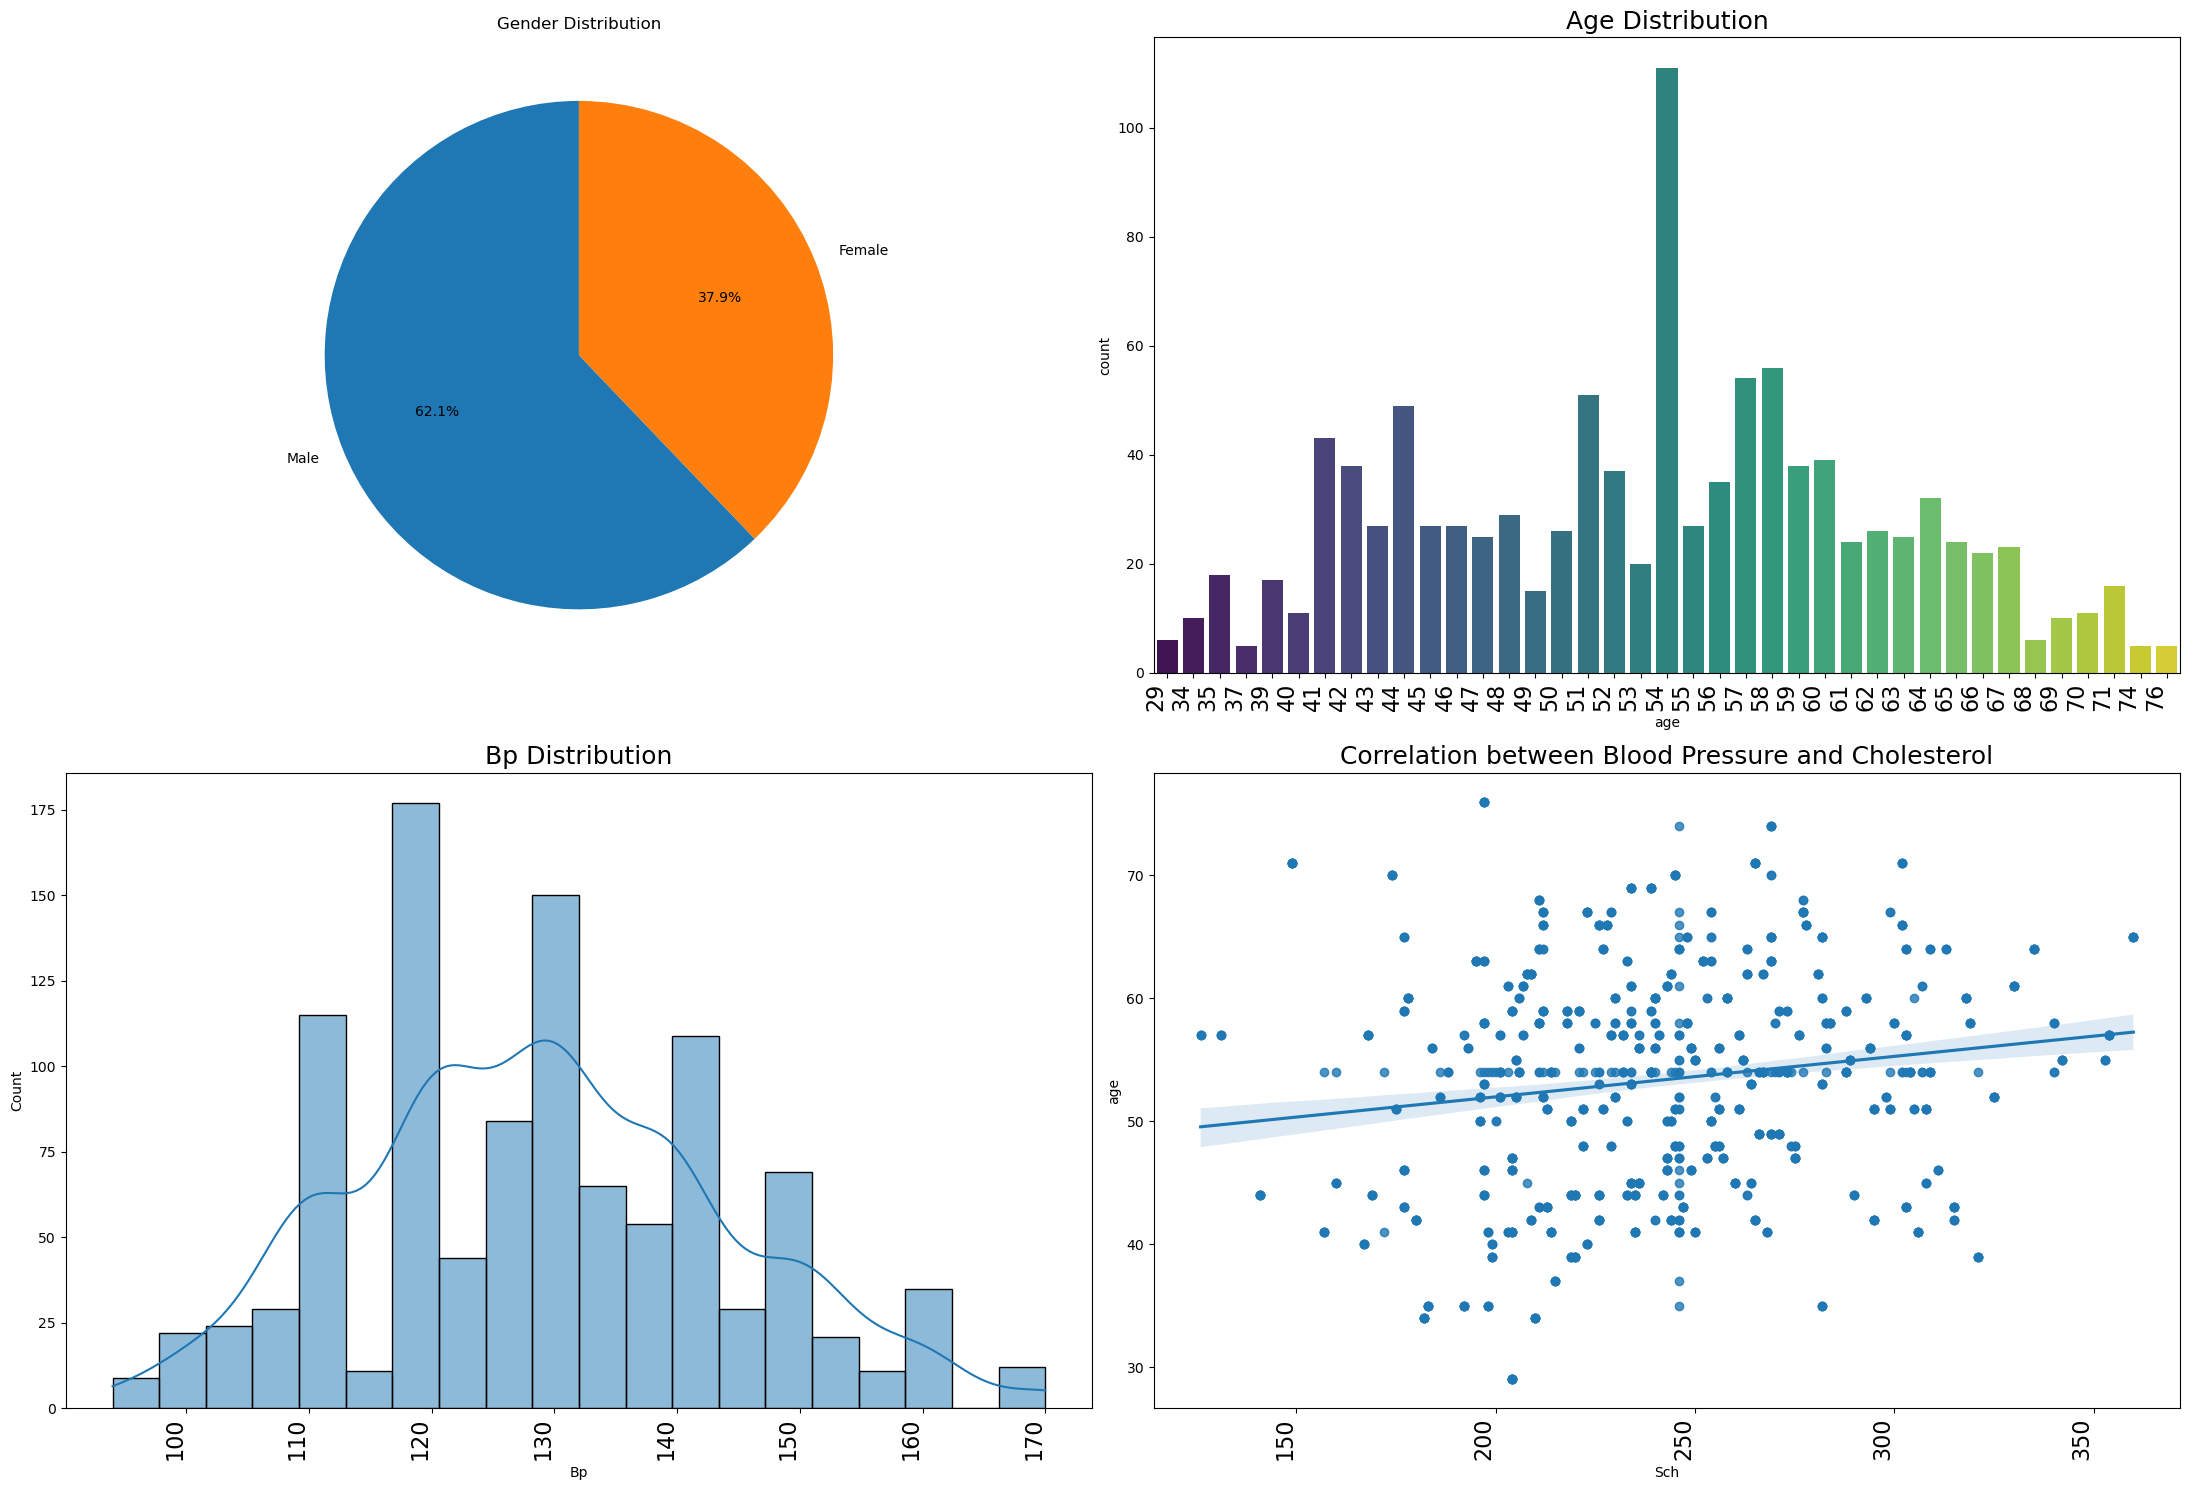

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(22, 15))

ax[0, 0].pie(heart['sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0, 0].set_title('Gender Distribution')

sns.countplot(x='age', data=heart, palette='viridis', ax=ax[0, 1]).set_title('Age Distribution', fontsize=18)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90, ha='right', fontsize=16)

sns.histplot(x='Bp', data=heart, ax=ax[1, 0], kde=True).set_title('Bp Distribution', fontsize=18)

sns.regplot(x='Sch', y='age', data=heart, ax=ax[1, 1]).set_title('Correlation between Blood Pressure and Cholesterol', fontsize=18)

for axes_row in ax:
    for axes in axes_row:
        axes.set_xticklabels(axes.get_xticklabels(), rotation=90, ha='right', fontsize=16)

plt.tight_layout()
plt.show()


Distribution of Patient Age and selected indicators

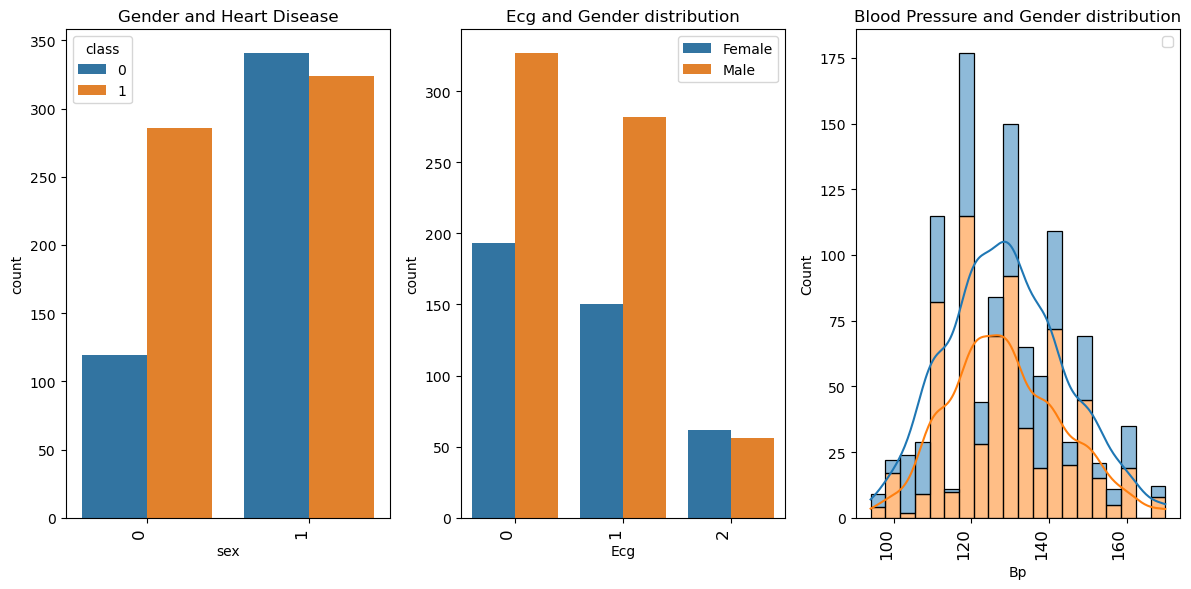

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

sns.countplot(x='sex', data=heart, hue='class', ax=ax[0]).set_title('Gender and Heart Disease')
sns.countplot(x='Ecg', data=heart, hue='sex', ax=ax[1]).set_title('Ecg and Gender distribution')
sns.histplot(x='Bp', data=heart, ax=ax[2], kde=True, hue='sex', multiple='stack').set_title('Blood Pressure and Gender distribution')

for axes in ax:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90, ha='right', fontsize=12)
    
for axes in [ax[1], ax[2]]:
    handles, labels = axes.get_legend_handles_labels()
    axes.legend(handles, ['Female','Male'])
    
plt.tight_layout()

plt.show()


Distribution of Exercise induce angina to Heart Disease and Age

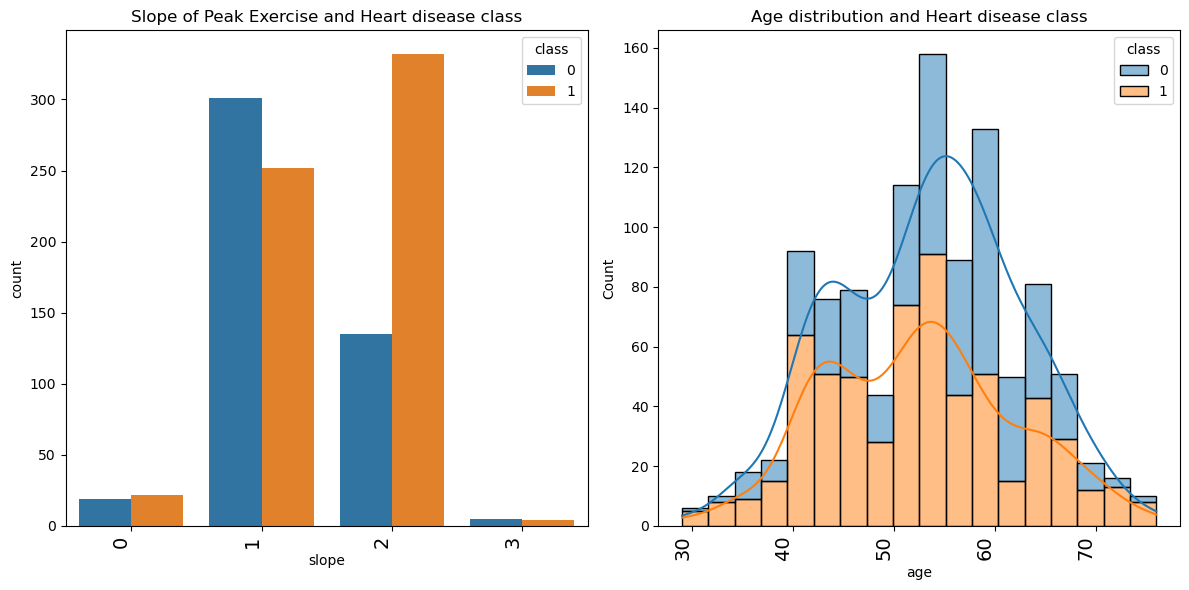

In [32]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.countplot(x='slope', data=heart, hue='class', ax=axes[0]).set_title('Slope of Peak Exercise and Heart disease class')
sns.histplot(x='age', data=heart, hue='class', kde=True, multiple='stack', ax=axes[1]).set_title('Age distribution and Heart disease class')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=14)

plt.tight_layout()
plt.show()

Violin plot of Indicators and Heart Disease

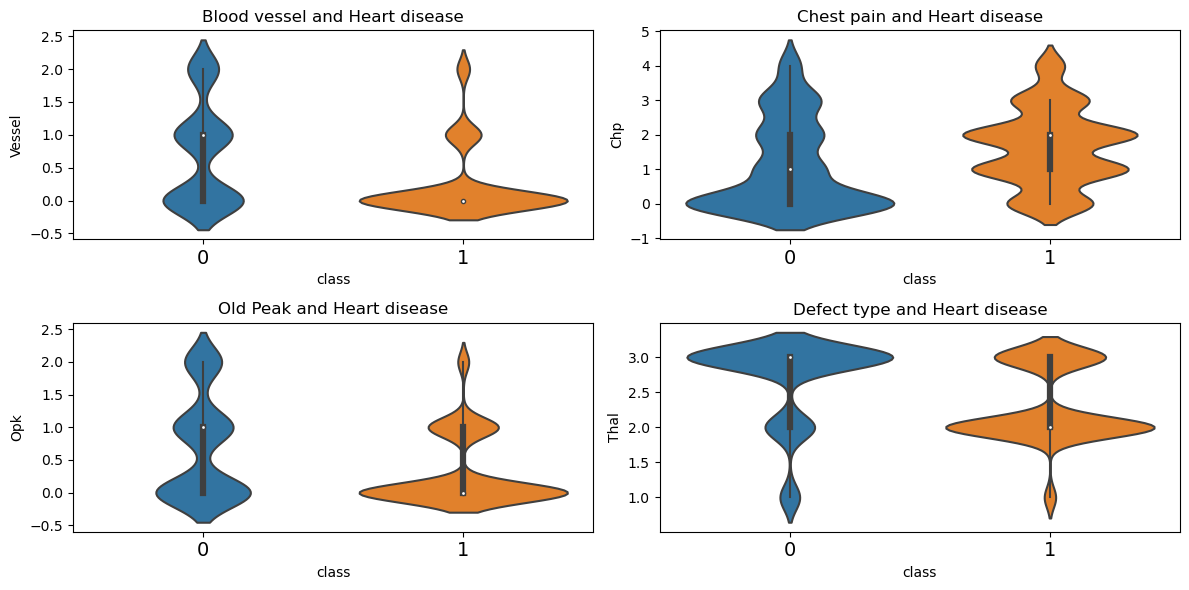

In [33]:
fig, axes = plt.subplots(2,2, figsize=(12,6))

sns.violinplot(x='class', y='Vessel', data=heart, ax = axes[0,0]).set_title('Blood vessel and Heart disease')
sns.violinplot(x='class', y='Chp', data=heart, ax = axes[0,1]).set_title('Chest pain and Heart disease')
sns.violinplot(x='class', y='Opk', data=heart, ax = axes[1,0]).set_title('Old Peak and Heart disease')
sns.violinplot(x='class', y='Thal', data=heart, ax = axes[1,1]).set_title('Defect type and Heart disease')

for ax_row in axes:
    for ax in ax_row:
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [34]:
#chech for missing values

check_missing = heart.isnull().sum() * 100/heart.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)


Series([], dtype: float64)

<Axes: >

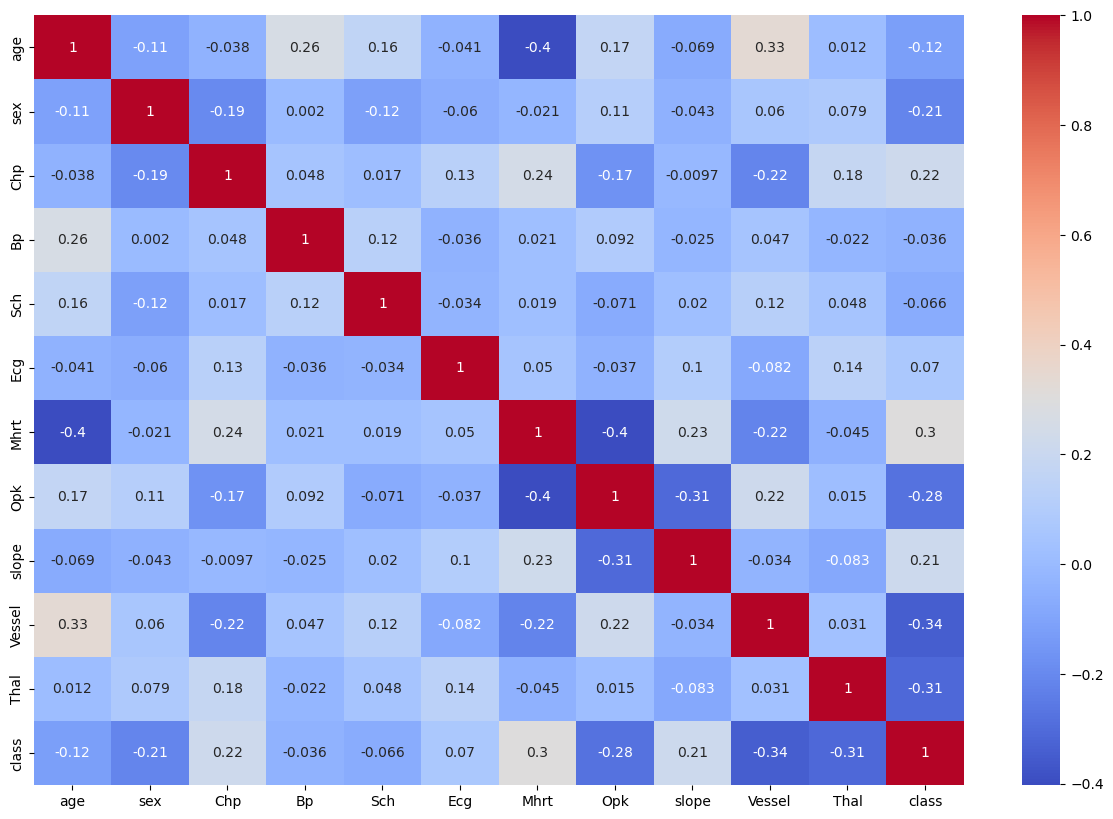

In [35]:
#coorelation Matrix heatmap

plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(), annot = True, cmap = 'coolwarm')

Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(heart.drop(columns=['class']), heart['class'], test_size = 0.2, random_state=42)

print('Testing set:', X_test.shape, y_test.shape)
print('Training set:', X_train.shape, y_train.shape)


Testing set: (214, 11) (214,)
Training set: (856, 11) (856,)


**Cardio Vascular Disease Prediction**

For predicting the cardiovascular disease, I'll be using the following classification models:

`1.`Random Forest Classifier\
`2.`XBG Classifier\
`3.`Decision Tree

**Random Forest Classifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV


Hyperparameter tuning

In [39]:
rfc_model = RandomForestClassifier()

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True, False]
}

bayes_search = BayesSearchCV(rfc_model,param_grid, cv=5,error_score ='raise' )
bayes_search.fit(X_train, y_train)

print('Best Hyperparameters:',bayes_search.best_params_)
print('Best Score(Accuracy):',bayes_search.best_score_)

best_rfc_params = bayes_search.best_params_

Best Hyperparameters: OrderedDict([('bootstrap', False), ('max_depth', 10), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 200)])
Best Score(Accuracy): 0.8154290765673874


In [40]:
rfc_model = RandomForestClassifier(**best_rfc_params)

rfc_model.fit(X_train, y_train)

rfc_model

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       n_estimators=200)

In [41]:
rfc_prediction = rfc_model.predict(X_test)

rfc_prediction[0:5]

array([1, 1, 1, 0, 1])

**XGB Classifier**

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Hyperparameter tuning

In [43]:
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0,0.1,0.2],
    'min_child_weight':[1,2,3]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

print('Best Hyperparameter:',grid_search.best_params_)
print('Best Score(Accuracy);', grid_search.best_score_)

best_xgb_params = grid_search.best_params_

Best Hyperparameter: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best Score(Accuracy); 0.8107575139398886


In [44]:
xgb_model = XGBClassifier(**best_xgb_params)

xgb_model.fit(X_train, y_train)

xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
xgb_prediction = xgb_model.predict(X_test)

xgb_prediction[0:5]

array([1, 1, 1, 0, 1])

**Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [47]:
tree_model = DecisionTreeClassifier()

param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

bayes_search = BayesSearchCV(tree_model, param_grid, cv=5, error_score='raise')
bayes_search.fit(X_train,y_train)

print('Best Hyperparameter:', bayes_search.best_params_)
print('Best Score(Accuracy):', bayes_search.best_score_)

best_dtree_params = bayes_search.best_params_

Best Hyperparameter: OrderedDict([('criterion', 'gini'), ('max_depth', 30), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('splitter', 'random')])
Best Score(Accuracy): 0.7991296069631443


In [48]:
tree_model = DecisionTreeClassifier(**best_dtree_params)

tree_model.fit(X_train,y_train)

tree_model

DecisionTreeClassifier(max_depth=30, max_features='sqrt', splitter='random')

In [49]:
tree_prediction = tree_model.predict(X_test)

tree_prediction[0:5]

array([1, 1, 1, 0, 1])

**Model Evaluation**

Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [64]:
def plot_confusion_matrix(y_true, y_preds, model_names):
    fig, axes = plt.subplots(1, len(y_preds), figsize=(18,7))
    
    for i, (pred, model_name) in enumerate(zip(y_preds, model_names)):
        
        cm = confusion_matrix(y_true, pred)
        ax = axes[i]
        sns.heatmap(cm, annot=True, ax=ax, cmap='coolwarm')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.xaxis.set_ticklabels(['False Positive', 'True Negative'])
        ax.yaxis.set_ticklabels(['True Positive ', 'False Negative'])
    
    plt.tight_layout()    
    plt.show()


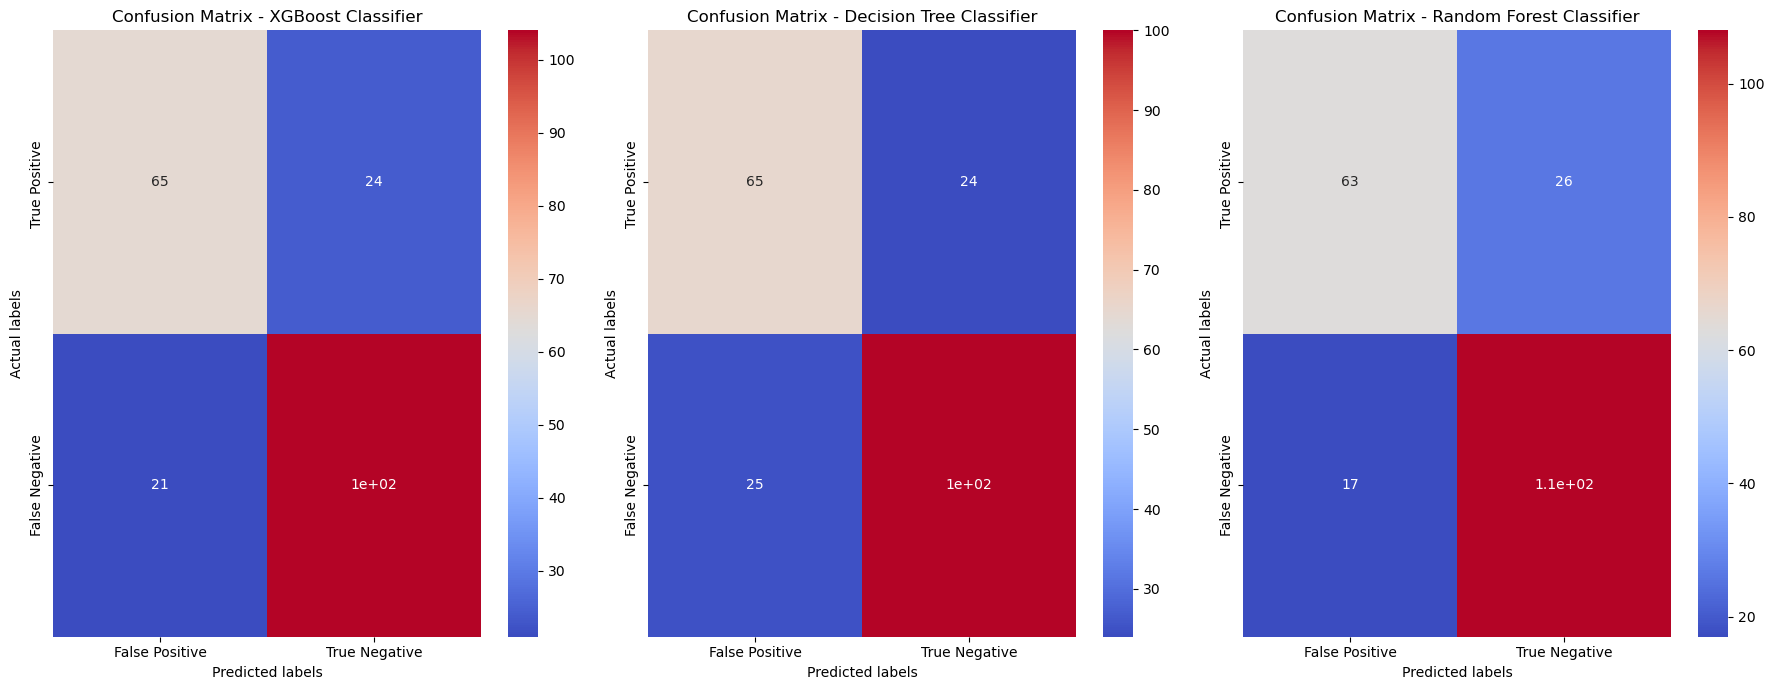

In [65]:
y_true = y_test
y_preds= [xgb_prediction, tree_prediction, rfc_prediction]
model_names = ['XGBoost Classifier','Decision Tree Classifier','Random Forest Classifier']
plot_confusion_matrix(y_true, y_preds, model_names)

- True Positive (TP): The model correctly predicts positive instances as positive.
- False Positive (FP): The model incorrectly predicts negative instances as positive.
- False Negative (FN): The model incorrectly predicts positive instances as negative.
- True Negative (TN): The model correctly predicts negative instances as negative.


The confusion matrix heatmap visualizes the true positive and true negative value counts in the 3 machine learning models.\
`The Random Forest classifier` has only `43` false positive and negative values.\
`The XGBoost classifier` has `45` false positive and negative values.\
`The Decision Tree classifier` has `49` false positive and negative values.\

overall, the `Random Forest classifier` has a better accuracy compared to other listed above.

Performance report

In [68]:
precision_xgb = precision_score(y_test, xgb_prediction)
recall_xgb = recall_score(y_test, xgb_prediction)
f1_xgb = f1_score(y_test, xgb_prediction)

precision_rf = precision_score(y_test, rfc_prediction)
recall_rf = recall_score(y_test, rfc_prediction)
f1_rf = f1_score(y_test, rfc_prediction)

precision_dt = precision_score(y_test, tree_prediction)
recall_dt = recall_score(y_test, tree_prediction)
f1_dt = f1_score(y_test, tree_prediction)


In [69]:

list_precision = [precision_rf,precision_xgb,precision_dt]
list_recall = [recall_rf,recall_xgb,recall_dt]
list_f1 = [f1_rf,f1_xgb,f1_dt]
list_acc = [acc_rf,acc_xgb,acc_dt]

Report = pd.DataFrame(list_precision, index=['RandomForest Classifier','XGB Classifier','Decision Tree'])
Report.columns =['Precision']
Report.insert(loc=1,column='Recall',value=list_recall)
Report.insert(loc=2, column='F1 Score', value=list_f1)

Report.columns.name = 'Algorithm'
print(Report)

Algorithm                Precision  Recall  F1 Score
RandomForest Classifier   0.805970   0.864  0.833977
XGB Classifier            0.812500   0.832  0.822134
Decision Tree             0.806452   0.800  0.803213


**Classification Report**

In [72]:
print(f"XGBoostClassifier \n\n{classification_report(y_test, xgb_prediction)}")
print(f"DecisionTreeClassifier \n\n{classification_report(y_test, tree_prediction)}")
print(f"RandomForestClassifier \n\n{classification_report(y_test, rfc_prediction)}")
 

XGBoostClassifier 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        89
           1       0.81      0.83      0.82       125

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214

DecisionTreeClassifier 

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        89
           1       0.81      0.80      0.80       125

    accuracy                           0.77       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.77      0.77      0.77       214

RandomForestClassifier 

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        89
           1       0.81      0.86      0.83       125

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weig

**Conclusion**

Based on the metrics, visualizations, and analysis provided, the `Random Forest Classifier` emerges as the preferred machine learning model for classifying patients cardiovascular disease status. This conclusion is drawn from its higher accuracy of `80%`, compared to `77` and `79%` for both the `Decision Tree Classifier` and the `XGBoost Classifier`. Consequently, the `Random Forest Classifier` outperformed the other models, demonstrating superior predictive capabilities in this scenario.